# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Ensure results directory exists

In [2]:
os.makedirs('../python_results', exist_ok=True)

# Load data and predictions

In [3]:
X_train = pd.read_csv('../python_results/X_train.csv')
X_test = pd.read_csv('../python_results/X_test.csv')
y_train = pd.read_csv('../python_results/y_train.csv').squeeze()
y_test = pd.read_csv('../python_results/y_test.csv').squeeze()

# Retrain best models for interpretability

In [4]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [5]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Feature importance for tree-based models

In [7]:
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
importances_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

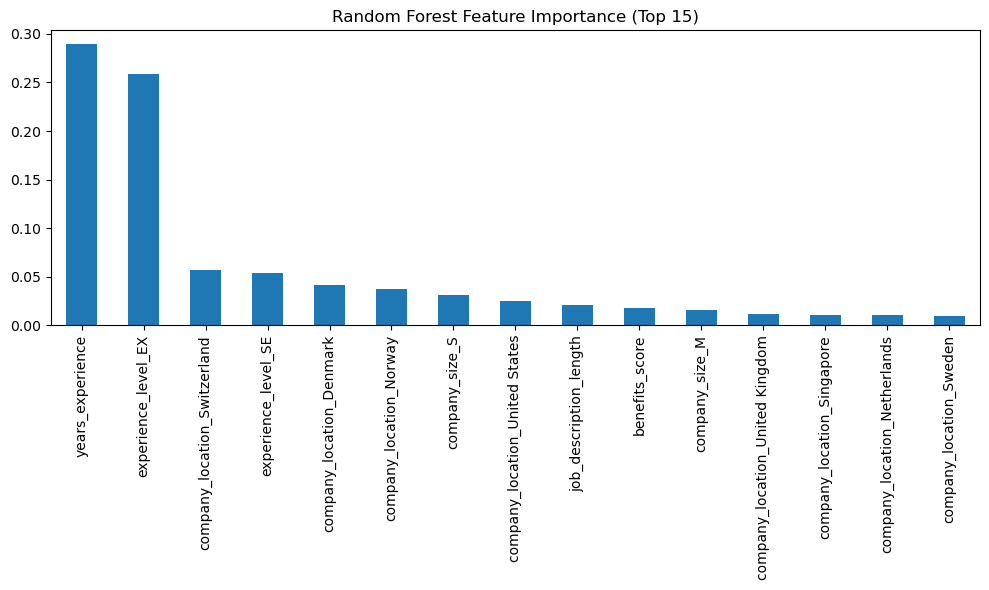

In [8]:
plt.figure(figsize=(10,6))
importances_rf.head(15).plot(kind='bar')
plt.title('Random Forest Feature Importance (Top 15)')
plt.tight_layout()
plt.savefig('../python_results/rf_feature_importance.png')
plt.show()

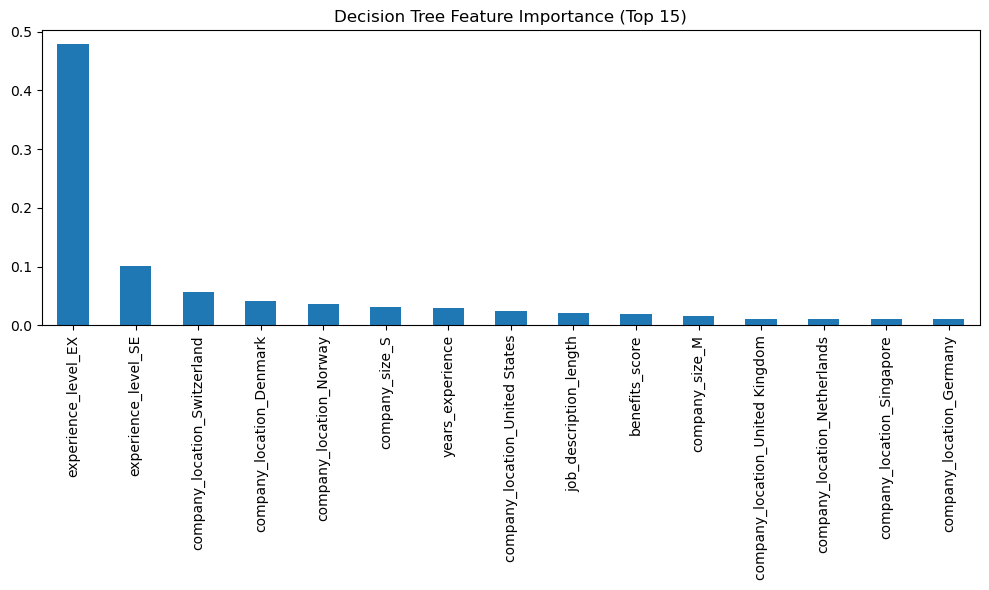

In [9]:
plt.figure(figsize=(10,6))
importances_dt.head(15).plot(kind='bar')
plt.title('Decision Tree Feature Importance (Top 15)')
plt.tight_layout()
plt.savefig('../python_results/dt_feature_importance.png')
plt.show()

# Linear regression coefficients

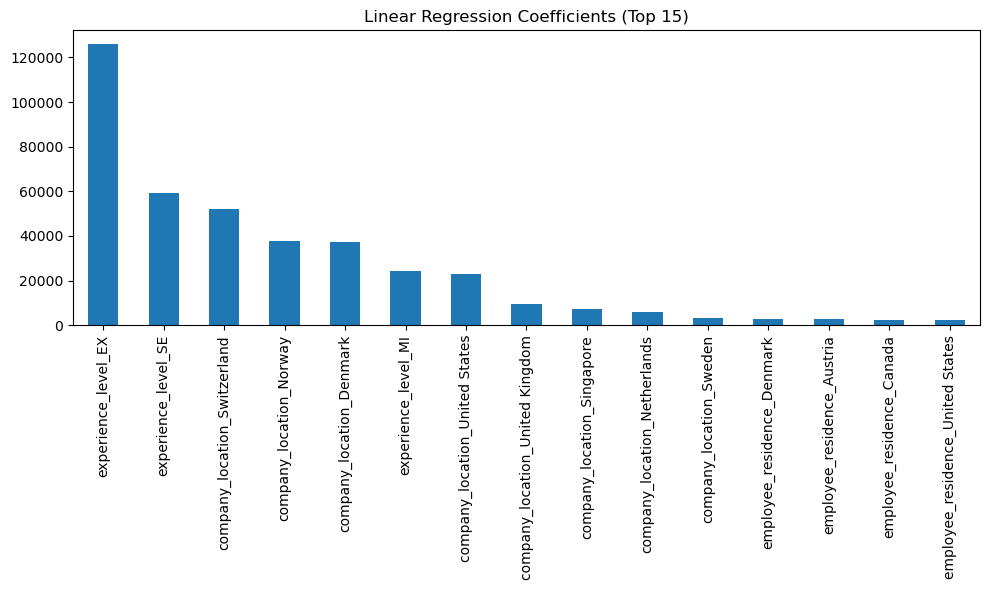

In [10]:
coefs = pd.Series(lr.coef_, index=X_train.columns)
plt.figure(figsize=(10,6))
coefs.sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Linear Regression Coefficients (Top 15)')
plt.tight_layout()
plt.savefig('../python_results/linear_regression_coefficients.png')
plt.show()

# Actual vs Predicted plots

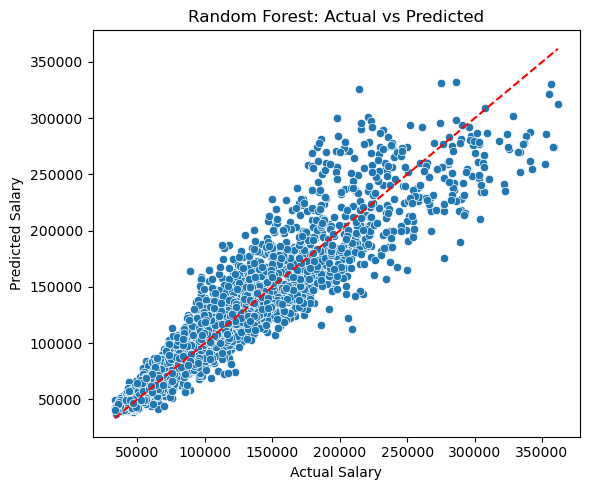

In [11]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: Actual vs Predicted')
plt.tight_layout()
plt.savefig('../python_results/rf_actual_vs_predicted.png')
plt.show()

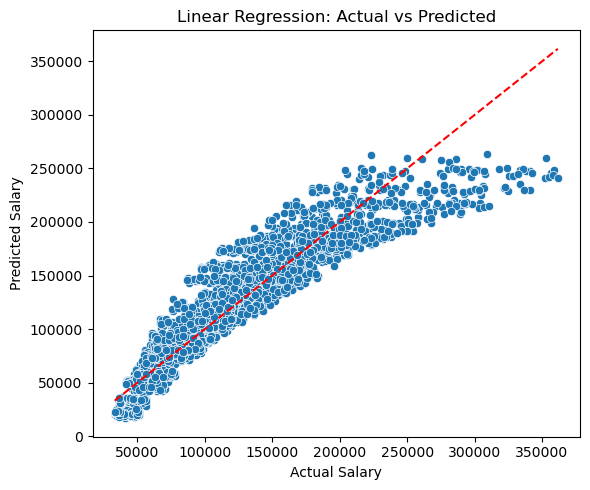

In [12]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs Predicted')
plt.tight_layout()
plt.savefig('../python_results/lr_actual_vs_predicted.png')
plt.show()

# Residuals analysis

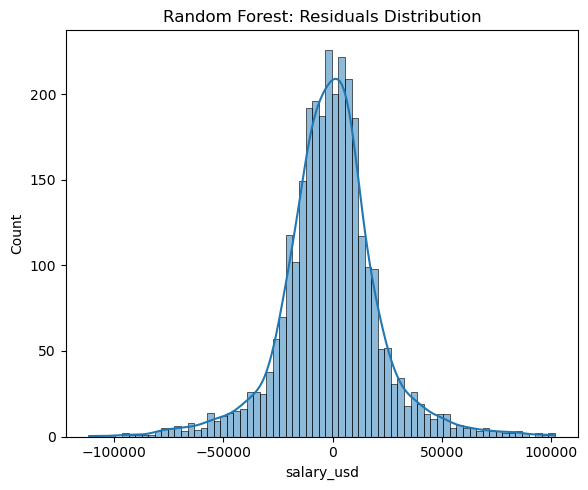

In [13]:
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(6,5))
sns.histplot(residuals_rf, kde=True)
plt.title('Random Forest: Residuals Distribution')
plt.tight_layout()
plt.savefig('../python_results/rf_residuals.png')
plt.show()

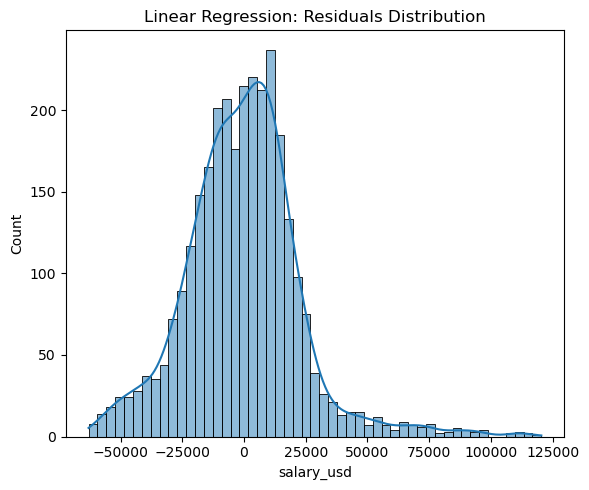

In [14]:
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6,5))
sns.histplot(residuals_lr, kde=True)
plt.title('Linear Regression: Residuals Distribution')
plt.tight_layout()
plt.savefig('../python_results/lr_residuals.png')
plt.show()

# Overfitting/underfitting check (train vs test R2)

In [15]:
from sklearn.metrics import r2_score

In [16]:
rf_train_r2 = r2_score(y_train, rf.predict(X_train))
rf_test_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest R2 - train: {rf_train_r2:.3f}, test: {rf_test_r2:.3f}")

Random Forest R2 - train: 0.981, test: 0.865


In [17]:
dt_train_r2 = r2_score(y_train, dt.predict(X_train))
dt_test_r2 = r2_score(y_test, y_pred_dt)
print(f"Decision Tree R2 - train: {dt_train_r2:.3f}, test: {dt_test_r2:.3f}")

Decision Tree R2 - train: 1.000, test: 0.738


In [18]:
lr_train_r2 = r2_score(y_train, lr.predict(X_train))
lr_test_r2 = r2_score(y_test, y_pred_lr)
print(f"Linear Regression R2 - train: {lr_train_r2:.3f}, test: {lr_test_r2:.3f}")

Linear Regression R2 - train: 0.851, test: 0.852


# Export results

In [19]:
r2_results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Linear Regression'],
    'R2_train': [rf_train_r2, dt_train_r2, lr_train_r2],
    'R2_test': [rf_test_r2, dt_test_r2, lr_test_r2]
})

r2_results.to_csv('../python_results/overfitting_check_r2.csv', index=False)
display(r2_results)

,Model,R2_train,R2_test
0,Random Forest,0.980992,0.864647
1,Decision Tree,1.000000,0.738281
2,Linear Regression,0.850882,0.852267
